In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Generating 20 data points

N = 20

In [3]:
# random data on the x-axis in (-5, +5)

X = np.random.random(N) * 10 - 5

In [4]:
X

array([-0.34633715,  3.79218327, -0.88868364, -0.9749702 ,  4.2970834 ,
       -1.62750216, -0.24543739, -3.60752405, -3.35448124, -0.21883644,
       -0.69496691, -1.87354707,  0.897844  ,  3.01374495, -2.808849  ,
       -3.95228701,  1.20251735, -3.53011712, -4.63725093,  0.17261945])

In [5]:
# a line plus some noise

Y = 0.5 * X - 1 + np.random.randn(N)

In [6]:
Y

array([-1.81876919,  1.75930535, -0.38682734, -2.18276485,  1.49204504,
       -2.09992635, -2.48211936, -2.73347692, -1.29034652, -1.80285323,
       -1.04831324, -3.40778902, -1.44016126, -0.11888808, -4.53699388,
       -3.73424161,  0.6971471 , -0.5164739 , -3.921597  , -2.11812354])

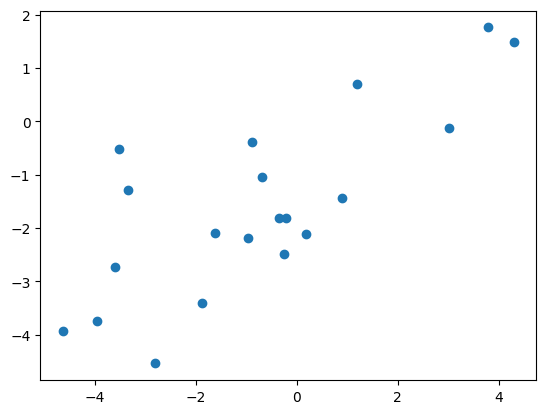

In [7]:
# Plot the data

plt.scatter(X, Y)
plt.show()

In [8]:
# Create the linear regression model

model = nn.Linear(1, 1)

In [9]:
# Loss and optimizer

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [10]:
# In ML we want our data to be shape:
# (num_samples x num_dimensions)

X = X.reshape(N, 1)
Y = Y.reshape(N, 1)

In [11]:
# PyTorch uses float32 by default
# Numpy creates float64 by default

input = torch.from_numpy(X.astype(np.float32))
targets = torch.from_numpy(Y.astype(np.float32))

In [12]:
type(input)

torch.Tensor

In [13]:
# Training the model

n_epochs = 50
losses = []
for i in range(n_epochs):
  # zero the parameter gradients
  optimizer.zero_grad()

  # Forward pass
  output = model(input)
  loss = criterion(output, targets)

  # keep the loss so we can plot it later
  losses.append(loss.item())

  # Backward and optimize
  loss.backward()
  optimizer.step()

  print(f"Epoch {i+1} / {n_epochs}, Loss: {loss.item():.4f}")

Epoch 1 / 50, Loss: 3.7892
Epoch 2 / 50, Loss: 2.9258
Epoch 3 / 50, Loss: 2.3449
Epoch 4 / 50, Loss: 1.9541
Epoch 5 / 50, Loss: 1.6910
Epoch 6 / 50, Loss: 1.5141
Epoch 7 / 50, Loss: 1.3950
Epoch 8 / 50, Loss: 1.3148
Epoch 9 / 50, Loss: 1.2609
Epoch 10 / 50, Loss: 1.2246
Epoch 11 / 50, Loss: 1.2002
Epoch 12 / 50, Loss: 1.1838
Epoch 13 / 50, Loss: 1.1727
Epoch 14 / 50, Loss: 1.1653
Epoch 15 / 50, Loss: 1.1603
Epoch 16 / 50, Loss: 1.1569
Epoch 17 / 50, Loss: 1.1547
Epoch 18 / 50, Loss: 1.1531
Epoch 19 / 50, Loss: 1.1521
Epoch 20 / 50, Loss: 1.1514
Epoch 21 / 50, Loss: 1.1509
Epoch 22 / 50, Loss: 1.1506
Epoch 23 / 50, Loss: 1.1504
Epoch 24 / 50, Loss: 1.1503
Epoch 25 / 50, Loss: 1.1502
Epoch 26 / 50, Loss: 1.1501
Epoch 27 / 50, Loss: 1.1501
Epoch 28 / 50, Loss: 1.1500
Epoch 29 / 50, Loss: 1.1500
Epoch 30 / 50, Loss: 1.1500
Epoch 31 / 50, Loss: 1.1500
Epoch 32 / 50, Loss: 1.1500
Epoch 33 / 50, Loss: 1.1500
Epoch 34 / 50, Loss: 1.1500
Epoch 35 / 50, Loss: 1.1500
Epoch 36 / 50, Loss: 1.1500
E

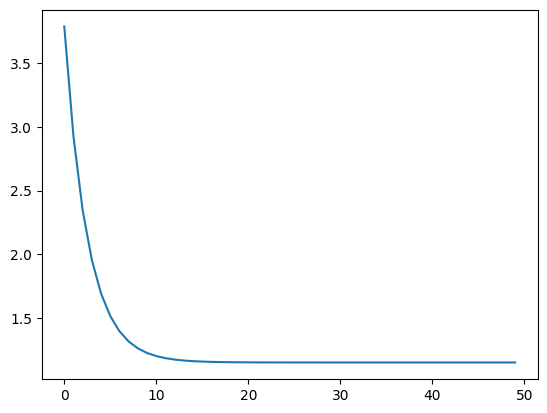

In [14]:
# Plotting the Loss per iteration

plt.plot(losses)
plt.show()

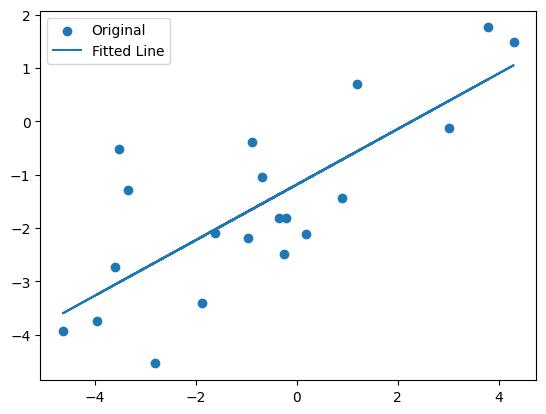

In [16]:
# Ploting the Graph

predicted = model(input).detach().numpy()
plt.scatter(X, Y, label = "Original")
plt.plot(X, predicted, label = "Fitted Line")
plt.legend()
plt.show()

In [17]:
# Another way

with torch.no_grad():
  out = model(input).numpy()
out

array([[-1.3644148 ],
       [ 0.78916025],
       [-1.6466374 ],
       [-1.6915387 ],
       [ 1.0518968 ],
       [-2.0310988 ],
       [-1.3119093 ],
       [-3.0614493 ],
       [-2.9297724 ],
       [-1.2980669 ],
       [-1.5458324 ],
       [-2.159134  ],
       [-0.7169763 ],
       [ 0.38408184],
       [-2.6458402 ],
       [-3.2408545 ],
       [-0.5584324 ],
       [-3.0211687 ],
       [-3.5972915 ],
       [-1.0943637 ]], dtype=float32)

In [19]:
# Important!
# In order to test the efficacy of the model, synthetic data is usefull
# Why ?
# Because ***we know the answer***
# True values of (w, b) are (0.5, -1)

w = model.weight.data.numpy()
b = model.bias.data.numpy()
print(w, b)

[[0.5203732]] [-1.1841903]
